# Dataset

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 1. 전처리 미리 정의
IMG_SIZE = (64, 64)
BATCH_SIZE = 64

transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(), # 1) [0.0, 1.0] 실수 범위로 압축, 2) (H, W, C) -> (C, H, W)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # 각각의 RGB 채널 평균 0.5, 표준편차 0.5로 Norm
])

# 2. Load train/validation/test datasets
train_set = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
val_set = torchvision.datasets.Flowers102(root='/data', split='val', download=True, transform=transform)
test_set = torchvision.datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

# 3. 데이터셋 3종류 하나로 합치기(validation, test 불필요)
dataset = ConcatDataset([train_set, val_set, test_set])

# 4. 필요없는 변수 삭제 -> 메모리 절약
del train_set, val_set, test_set

# 5. dataloader
dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, # 섞기
    num_workers=2, # 데이터 로드 병렬 (CPU 프로세스 2개 사용)
    drop_last=True # 자투리 버리기
)

In [27]:
# shape 확인
iterForShapeCheck = iter(dataloader)
oneBatchTensorForShapeCheck = next(iterForShapeCheck)[0]
print(f"Shape of One Batch: {oneBatchTensorForShapeCheck.shape}")

Shape of One Batch: torch.Size([64, 3, 64, 64])


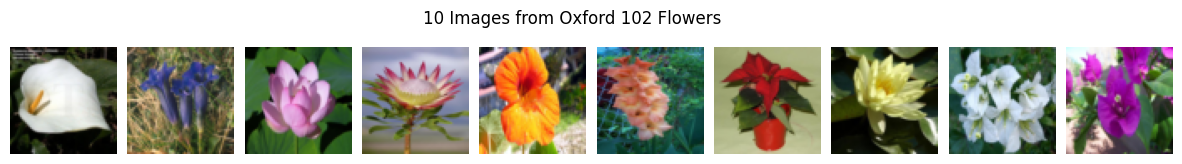

In [21]:
# 10개만 시각화해서 확인
## 1) batch 하나 준비
dataIterator = iter(dataloader) # dataloader은 iterable 하지만 iterator는 아님 -> iterator로 만들어주기
images, labels = next(dataIterator) # images, labels에 batch 하나가 담김

## 2) 도화지 정의
fig, axes = plt.subplots(1, 10, figsize=(15, 3)) # fig: 전체 도화지, axes: 각각의 칸(numpy array)
plt.subplots_adjust(wspace=0.1) # 이미지 사이 간격

## 3) 그림 그리기
for i in range(10):
  img = images[i]
  img = (img * 0.5) + 0.5 # Normalize 했던거 원래대로 복구
  img = img.permute(1, 2, 0) # (C, H, W) -> (H, W, C)
  axes[i].imshow(img.cpu().numpy()) # numpy(): Tensor -> Numpy Array
  axes[i].axis('off') # 눈금제거

plt.suptitle("10 Images from Oxford 102 Flowers", y=0.8)
plt.show()